<a href="https://colab.research.google.com/github/AyakaSenpai/dataset-Wholesale-customers.ipynb/blob/main/dataset_Wholesale_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Wholesale customers**

**1. Import Library**

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

**2. Load Dataset**

In [6]:

df = pd.read_csv("Wholesale customers data.csv")
display(df.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


**3. EDA - Distribusi Target**

/tmp/ipython-input-9-3756037446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=df, palette='Set2')


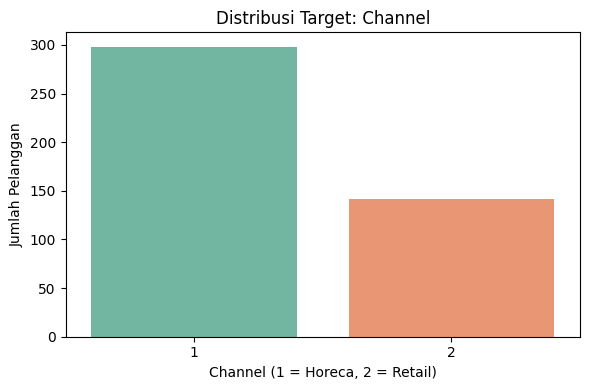

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Channel', data=df, palette='Set2')
plt.title("Distribusi Target: Channel")
plt.xlabel("Channel (1 = Horeca, 2 = Retail)")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()

**4. Korelasi antar fitur**

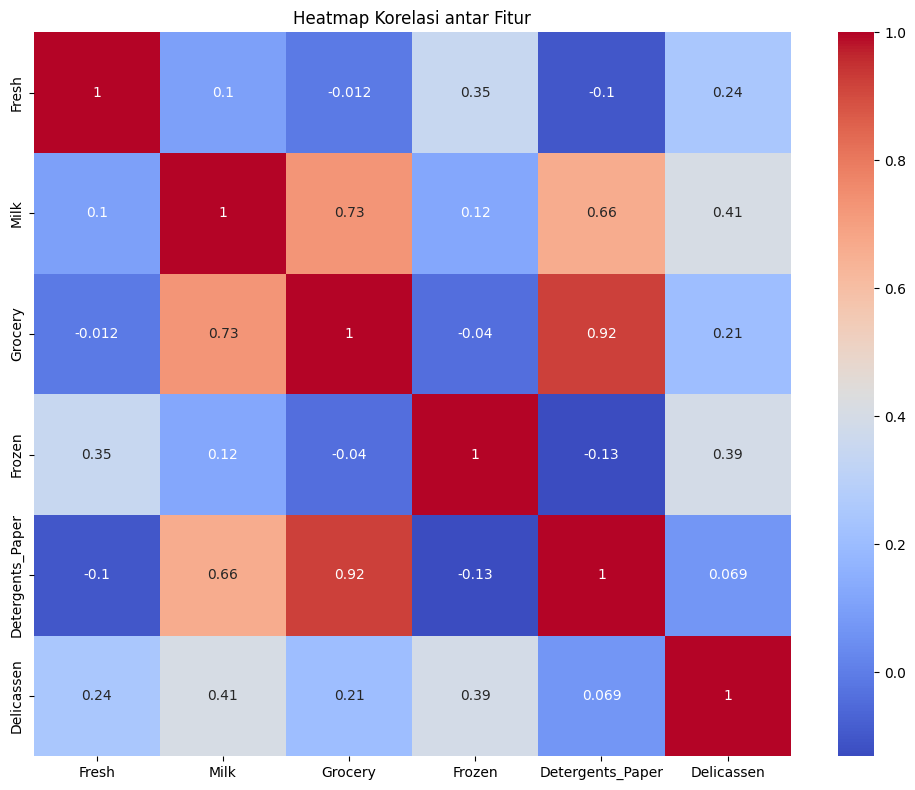

In [11]:
X = df.drop(['Channel', 'Region'], axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi antar Fitur")
plt.tight_layout()
plt.show()

**5. PREPROCESSING**

In [12]:
y = df['Channel']  # Target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

 **Normalisasi**

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**6. TRAINING MODEL**

In [14]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

**7. EVALUASI MODEL**

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Confusion Matrix ===
[[86  3]
 [ 5 38]]

=== Classification Report ===
              precision    recall  f1-score   support

           1       0.95      0.97      0.96        89
           2       0.93      0.88      0.90        43

    accuracy                           0.94       132
   macro avg       0.94      0.93      0.93       132
weighted avg       0.94      0.94      0.94       132



**Cross-validation**

In [16]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"\nAkurasi Rata-rata (5-Fold Cross-Validation): {cv_scores.mean():.2f}")


Akurasi Rata-rata (5-Fold Cross-Validation): 0.90


**8. FEATURE IMPORTANCE**

/tmp/ipython-input-17-3568038875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


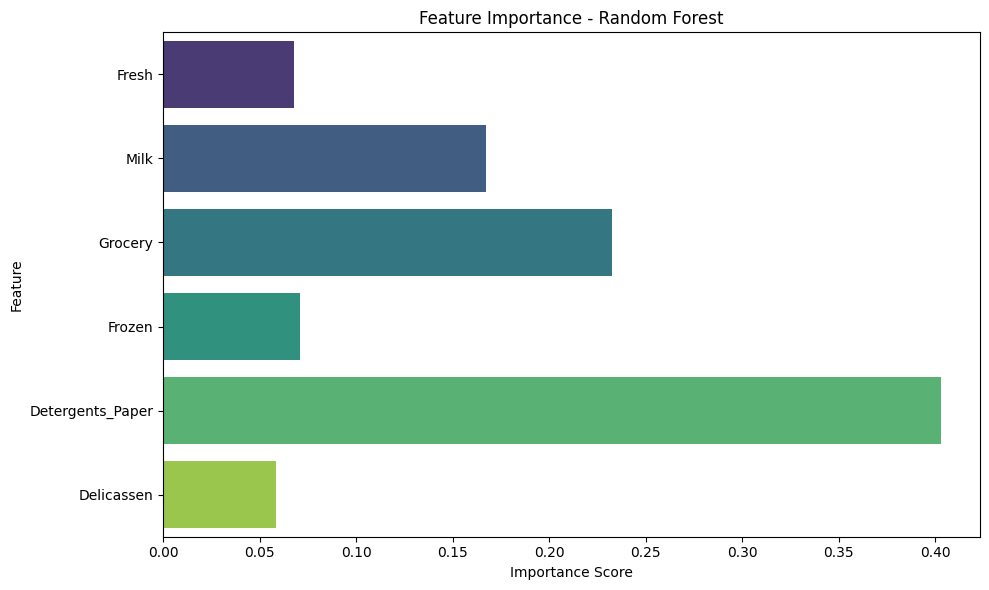

In [17]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**9. ROC CURVE**

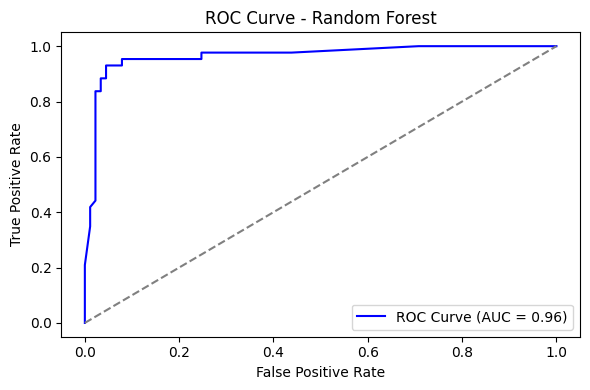

In [18]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=2)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()